# [Clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)

É uma técnica de aprendizado não supervisionado que procura agrupar conjuntos de dados em grupos os quais espera-se que tenham sempre uma característica que os diferencie dos demais (que os identifique de forma inequívoca)

## Métodos de Clustering


Existem vários métodos de clustering. No nosso curso, veremos 3 algoritmos. É necessário ter em mente que cada um deles possui limitações. No nosso curso, vamos ver três deles: KMeans, DBSCAN e HCA.

# Clusterizando Dados Artificiais

Nessa aula, vamos começar com um exemplo mais didático e com dados gerados randomicamente pela função `make_blobs`. A ideia será gerar dados aritificiais em 3 dimensões e aplicar o K-Means para clusterizá-los. Vamos começar importando 2 módulos para plotagem e geração dos dados artificiais e preparando o nosso plot.

-----------------

#  K-Means

Precisamos, agora, utilizar algum método para realizar a clusterização de nossos dados. Um dos algoritmos mais simples para isso é o K-Means. Ele consiste dos seguintes passos:
 - Iniciar k centroides randômicos no nosso dataset. No caso, k é um hiperparâmetro e indica quantos clusters estamos procurando
 - Calcular a distância de cada ponto em relação a cada um desses centroides. Assimilar o ponto ao cluster cujo centroide estiver mais próximo
 - Depois que todos os pontos estiverem assimilados a algum cluster, calcular o ponto médio de cada um desses k clusters (daí o nome, k-means). Esse ponto médio será o novo centroide.
 - Repetir o processo até que a variância se estabilize
 
 [documentação oficial do KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)



# Entendendo o funcionamento do K-Means

O K-Means é um dos algoritmos de clustering não supervisionados mais simples que é usado para agrupar nossos dados no número K de clusters. O algoritmo designa iterativamente os pontos de dados para um dos clusters K com base em quão próximo o ponto está do centróide do cluster. O resultado do algoritmo K-Means é:

1. Número K de centróides do cluster


2. Pontos de dados classificados nos clusters


Você pode conferir um tutorial de como o K-Means funciona __[nesse vídeo do StatQuest](https://www.youtube.com/watch?v=4b5d3muPQmA)__, __[nesse vídeo do Siraj](https://www.youtube.com/watch?v=9991JlKnFmk)__ ou __[nesses slides da Universidade de NY](https://people.csail.mit.edu/dsontag/courses/ml13/slides/lecture14.pdf)__.

# Exemplo de Aplicações

O K-Means pode ser usado para qualquer tipo de agrupamento em que os dados não tenham sido explicitamente rotulados. Alguns dos exemplos do mundo real são dados abaixo:

- [Image Segmentation](https://www.sciencedirect.com/science/article/pii/S1877050915014143)
- [Chromosome segmentation](https://www.ijser.org/paper/Chromosome-Segmentation-Using-K-Means-Clustering.html)
- [News Comments Clustering](https://ieeexplore.ieee.org/document/5591774)
- [Grouping inventory by sales activity](https://www.sciencedirect.com/science/article/pii/S1877050915035929)
- [Clustering animals](https://www.sciencedirect.com/science/article/pii/S1877050914013155)
- [Bots and Anomaly Detection](https://www.computerweekly.com/tip/Botnet-detection-through-DNS-behavior-and-clustering-analysis)

## Esboço do Algoritmo

Supondo que temos os pontos de dados de entrada x1, x2, x3,…, xn e o valor de K (o número de clusters necessários). Seguimos o procedimento abaixo:

1. Escolha K pontos como os centróides iniciais do conjunto de dados, aleatoriamente ou o primeiro K.


2. Encontre a distância euclidiana de cada ponto no conjunto de dados com os pontos K identificados (centróides de cluster)


3. Atribua cada ponto de dados ao centróide mais próximo usando a distância encontrada na etapa anterior.


4. Encontre o novo centróide, calculando a média dos pontos em cada grupo de clusters.


5. Repita 2 a 4 para um número fixo de iterações ou até que os centróides não sejam alterados.



## Distância euclidiana entre dois pontos no espaço:

Se p = (p1, p2) e q = (q1, q2), então a distância é dada por

$$ d(p,q) = \sqrt{ (q_1 - p_1)^2 + (q_2 - p_2)^2 } $$

## Passo a passo

Vamos seguir as etapas acima usando o exemplo abaixo.

1. Considere 4 pontos de dados A, B, C, D 


2. Escolha dois centróides AB e CD, calculados como


AB = Média de A, B


CD = Média de C, D


3. Calcule a distância euclidiana ao quadrado entre todos os pontos de dados para os centróides AB, CD. Por exemplo, a distância entre A (2,3) e AB (4,2) pode ser dada por s = (2-4) ² + (3-2) ².


4. Se observarmos na figura, a distância destacada entre (A, CD) é 4 e é menor em comparação com (AB, A), que é 5. Como o ponto A está próximo ao CD, podemos mover A para o cluster de CD.


5. Existem dois clusters formados até o momento, vamos recalcular os centróides, isto é, B, ACD semelhante à etapa 2.


DAC = Média de A, C, D


B = B


6. Como sabemos que o K-Means é um procedimento iterativo, agora temos que calcular a distância de todos os pontos (A, B, C, D) até novos centróides (B, ACD) semelhantes ao passo 3.

7. Na figura acima, podemos ver que os respectivos valores de cluster são mínimos que A está muito longe do cluster B e próximo ao ACD do cluster. Todos os pontos de dados são atribuídos aos clusters (B, ACD) com base em sua distância mínima. O procedimento iterativo termina aqui.


8. Para concluir, começamos com dois centróides e terminamos com dois grupos, K = 2.




## Escolhendo K

## Método Elbow

Um método de escolha do valor K é o método do cotovelo. Neste método, executaremos o cluster K-Means para um intervalo de valores K, digamos (K = 1 a 10) e calcularemos a soma do erro quadrático (SSE). O SSE é calculado como a distância média entre os pontos de dados e o centróide do cluster.

Em seguida, plote um gráfico de linhas para os valores de SSE para cada K, se o gráfico de linhas parecer um braço, o cotovelo no braço será o valor de K que é o melhor.

$$
WCSS = \sum\limits_{i \in n} (x_i - c_i)^2 $$

onde $c_i$ é o centróide para a observação $x_i$.


## Silhouette Score

Silhouette refere-se a um método de interpretação e validação de consistência dentro de clusterização. A técnica fornece uma representação gráfica sucinta de quão bem cada objeto foi classificado. 

O valor da Silhouette é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). A silhueta varia de -1 a +1, onde um valor alto indica que o objeto é bem correspondido ao seu próprio cluster e mal correspondido aos agrupamentos vizinhos. Se a maioria dos objetos tiver um valor alto, a configuração de cluster será apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração de cluster pode ter muitos ou poucos clusters.

A silhueta pode ser calculada com qualquer métrica de distância, como a distância euclidiana ou a distância de Manhattan.

$$ 
s_i = \frac {b - a}{max(a,b)} $$



onde $a$ é a distância média de todas as observações dos pontos do mesmo cluster e $b$ é a distância média mínima de todas as otras observações de todos os outros clusters


<br>
<img src="https://www.researchgate.net/profile/Danielle_Belgrave/publication/304378246/figure/fig2/AS:391240064487430@1470290308933/A-silhouette-plot-used-for-non-hierarchical-clustering-k-means-from-20-with.png" align="center" width="40%">
<br>

Para aprofundar [clique aqui](https://en.wikipedia.org/wiki/Silhouette_(clustering))

---------------

# Aplicando o KMeans para Dados Sintéticos

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

In [13]:
# preparando o plor em 3D
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (20,14)

Na célula abaixo, importe make_blobs do módulo datasets do scikit e crie X e y a partir da função `make_blobs` que importamos. Sua documentação está __[aqui](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)__. Vamos começar com 800 samples, 3 features (a dimensionalidade do nosso dataset), 4 grupos e random_state 123.

In [14]:
X, y = make_blobs(n_samples=800, n_features=3,centers=4, random_state=123)

In [15]:
X.shape,y.shape

((800, 3), (800,))

Agora vamos plotar os dados gerados:

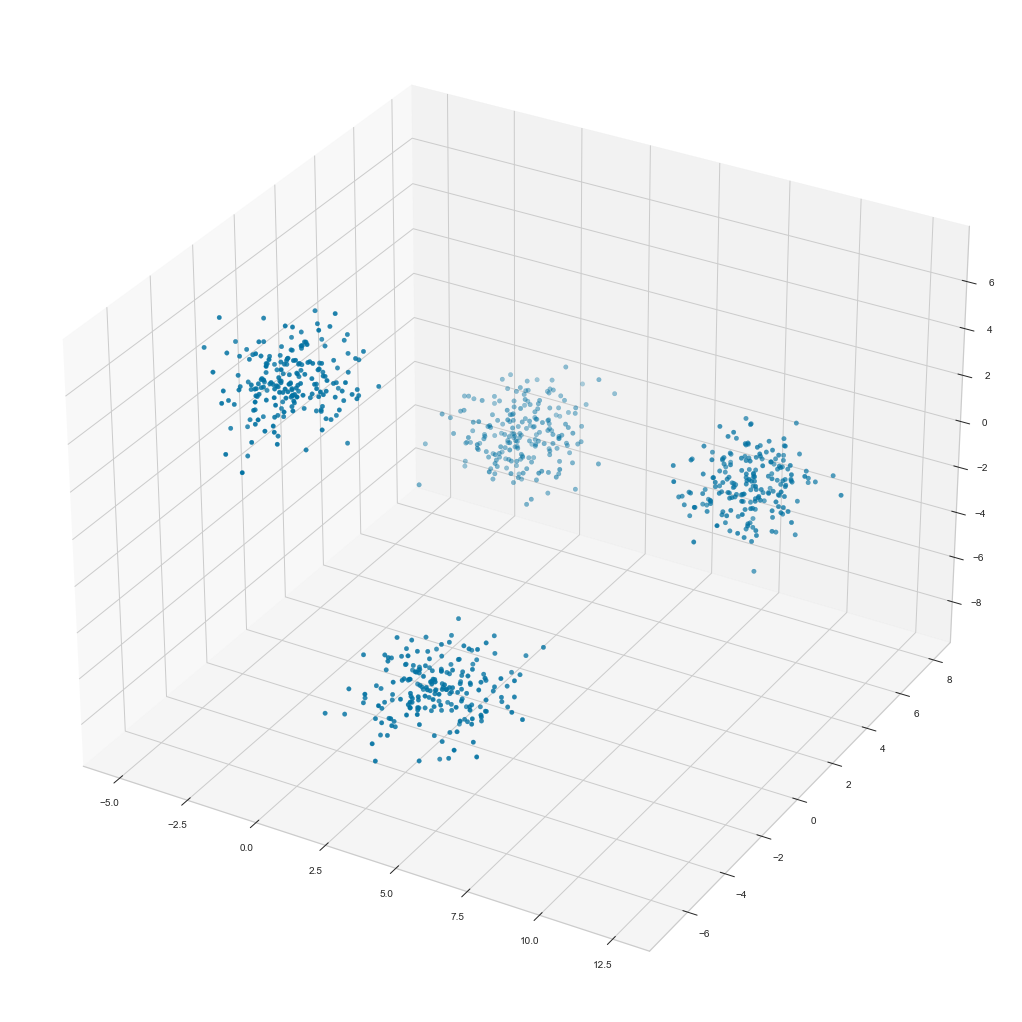

In [17]:
fig = plt.figure()
ax= Axes3D(fig)

ax.scatter(X[:,0],X[:,1],X[:,2])

Na célula abaixo, implemente um k-means com 4 centroides. Lembre-se que o K-Means é um modelo de predição, não transformação, portanto nosso foco será utilizar o `.predict()`. Além disso, estamos falando se aprendizado não-supervisionado, portanto não há labels, treino ou teste, há somente a aplicação do algoritmo no dataset. Crie também um objeto C que recebe o atributo `cluster_centers_` do modelo. <br>
Dica: importar classe, instanciar modelo, fitting, predict! 

Para documentação oficial acesse __[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)__

In [19]:
# kmeans
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels =kmeans.predict(X)
#Cluster centers
C = kmeans.cluster_centers_

Vamos agora visualizar se nosso algoritmo deu certo:

Cluster  1
[ 3.92641951 -4.32154363 -5.42941397]
Cluster  2
[ 0.97539985  4.3661875  -1.61345723]
Cluster  3
[-2.10872876 -3.06868236  4.66812604]
Cluster  4
[ 9.59804372  3.64965739 -0.36885258]


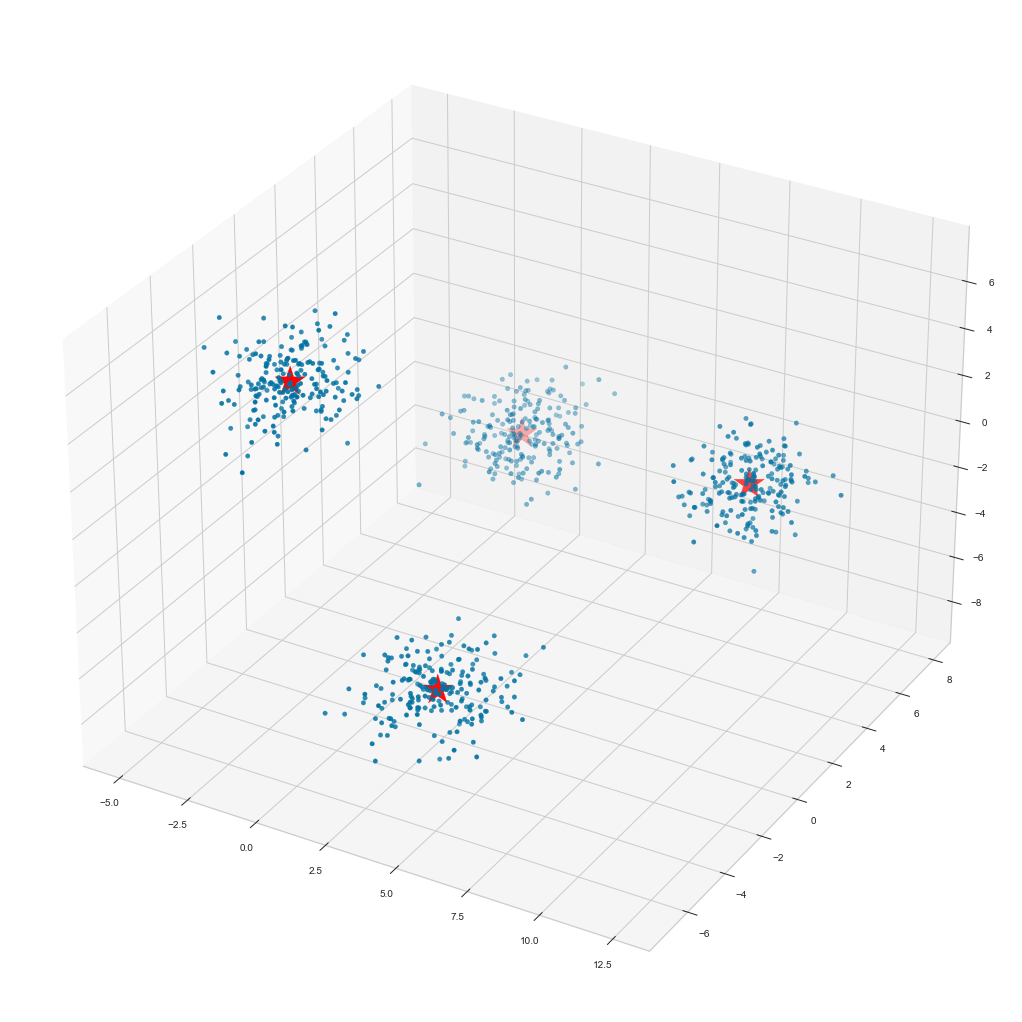

In [22]:
# plotando os clusters em 3-D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='red', s=1000)
counter = 1
for cluster in C:
    print('Cluster ',counter)
    print(cluster)
    counter += 1

## Escolhendo o número de clusters para o K-Means

### Elbow 
Voilà! Numa análise visual, parece que conseguimos clusterizar nossos dados não categorizados de uma forma viável! Porém, nós demos uma "roubada": já sabíamos que existiam 4 clusters, por isso deu certo. Para isso, utilizamos o **Método Elbow**: construímos diversos K-Means com K dentro de um range, e plotamos sua inércia-variância. Numa análise intuitiva, caso escolhemos 1 centroide, a variância será máxima, enquanto que com k = n_samples, a variância será 0. Qual é o ponto de saturação para a variância no nosso K-Means? É justamento esse ponto de inflexão, o "cotovelo", que escolheremos como hiperparâmetro do nosso modelo.

Abaixo, vamos realizar esse exercício. Vamos criar um loop `for` indo de 1 a 11, no qual dentro dele iremos instanciar e fazer o *fitting* do modelo em X, guardar e printar sua variância acessando o atributo `.inertia` do modelo. Por fim, iremos plotar o resultado e escolher um K:

Para um claro exemplo de utilização do WCSS no KMeans e aplicação do método Elbow acesse [K-means Clustering Python Example](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203)

### Silhouette Score

## Yellowbricks

### Elbow

### Silhouette

Os dois métodos podem ser usados. Geralmente plotamos os dois só pra ter mais certeza sobre a escolha.

#  Prós e Contras, Pontos de atenção e etc.

O algoritmo do K-Means possui várias vantagens:
    
- Fácil entendimento
- Bem difundido e implementado em várias bibliotecas
- Sempre retorna um resultado(também pode ser um contra)

Em contrapartida, podemos citar as seguintes desvantagens:
- Precisamos definir o K (matamos isso aí usando Elbow e Silhouette)
- É afetado por outliers (lembre-se que estamos lidando com médias)
- É afetado por efeitos de escala (lembre-se que estamos calculando distâncias, assim como o KNN)

# No free lunch

Bem, sim, a regressão linear funciona minimizando a soma dos resíduos quadrados. Mas isso por si só não é o objetivo de uma regressão: o que estamos tentando fazer é desenhar uma linha que sirva como um preditor confiável e imparcial de y com base em x. O teorema de Gauss-Markov nos diz que minimizar o SSE atinge esse objetivo - mas esse teorema se baseia em algumas suposições muito específicas. Se essas suposições forem quebradas, você ainda pode minimizar o SSE, mas pode não fazer nada. Imagine dizer “Você dirige um carro apertando o pedal. O pedal pode ser pressionado independentemente da quantidade de gasolina no tanque. Portanto, mesmo se o tanque estiver vazio, você ainda pode pisar no pedal e dirigir o carro. ”

Mas falar é fácil. Vejamos os dados frios e difíceis. Ou, na verdade, dados inventados.
<img src="http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/anscombe-1.png" align='center'>

Estes são meus dados inventados favoritos: Quarteto de Anscombe. Criado em 1973 pelo estatístico Francis Anscombe, esta mistura deliciosa ilustra a loucura de confiar cegamente em métodos estatísticos. Cada um dos conjuntos de dados tem o mesmo declive de regressão linear, interceptação, valor p e $ R ^ 2 $ - e ainda à primeira vista podemos ver que apenas um deles, I, é apropriado para regressão linear. Em II ele sugere a forma errada, em III ele é distorcido por um único outlier - e em IV não há nenhuma tendência!

Pode-se dizer que "a regressão linear ainda está funcionando nesses casos, porque está minimizando a soma dos quadrados dos resíduos". Mas que vitória de Pirro! A regressão linear sempre traçará uma linha, mas se for uma linha sem sentido, quem se importa?

Então, agora vemos que só porque uma otimização pode ser realizada não significa que estamos cumprindo nosso objetivo. E vemos que criar dados e visualizá-los é uma boa maneira de inspecionar as suposições de um modelo. Segure essa intuição, vamos precisar dela em um minuto.

## Há mesmo um padrão?

O primeiro ponto de atenção que gostaríamos de levantar é que mesmo uma distribuição uniforme pode gerar clusters no K-means. Na figura abaixo, não necessariamente existem dois grupos diferentes. Há apenas uma massa de dados igualmente distribuída em todos os pontos do espaço. Mesmo assim, o K-Means retorna um resultado pra nós, indicando haver 2 clusters de dados.

<img src="https://i.stack.imgur.com/gn1iM.png" align='center'>

## Os clusters são esféricos? 

O K-means assume que os clusters são esféricos. Ou seja, geometricamente, eles deveriam ser aglomerados, de forma que se parecessem com uma nuvem densa e circular de pontos.

Quando essa suposição é violada, o K-means pode enfrentar alguns problemas. No exemplo abaixo, nós, humanos, percebemos rapidamente a existência de dois agrupamentos nos dados. Contudo, essa condição geométrica viola uma das suposições do K-means.

<img src="http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/non_spherical-1.png" >

Quando utilizamos o K-means para clusterizar esses dados, obtemos a seguinte segmentação:

<img src="http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/plot_kmeans-1.png" width=500>

## Os clusters possuem tamanhos parecidos?

Vamos olhar a imagem abaixo.
<img src="http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/different_sizes-1.png">

Visualmente, conseguimos notar 3 nuvens de pontos. Para o K-means os clusters deveriam ter um número próximo de elementos/indivíduos. A tendência é que pontos de um cluster acabem migrando para outro. Vejamos a segmentação realizada pelo algoritmo.

<img src="http://varianceexplained.org/figs/2015-01-16-kmeans-free-lunch/different_sizes_kmeans-1.png">

Note que apesar do número K ser 3, com esperávamos, a diposição dos pontos em cada cluster pode não fazer sentido.

## Mínimos Locais

Assim como outros algoritmos de otimização há sempre o risco do K-means cair numa região de mínimos locais.

A imagem abaixo mostra vários clusters bem definidos. Porém, o algoritmo K-means não consegue separá-los perfeitamente, nos trazendo a ideia de que ele pode ter caído em uma região de mínimo local. Ou seja, essa solução é subótima.

<img src="https://i.stack.imgur.com/BILDt.png">

# Conclusão

O K-means é, como qualquer outro algoritmo de aprendizado, um processo de otimização. Lembre-se sempre que a otimização irá sempre ocorrer, independentemente do conjunto de dados. Mas nem sempre a solução ótima do problema encontrada pelo algoritmo resolve o problema de negócio. A ideia é sempre inspecionar as métricas e também, se possível, validar os clusters com uma anáçlis exploratória.